In [1]:
import pandas as pd
data= pd.read_csv('/content/drive/MyDrive/datasetsss/play_tennis.csv')

In [2]:
data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [3]:
data.describe()
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


,0
day,0
outlook,0
temp,0
humidity,0
wind,0
play,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['day']= le.fit_transform(data['day'])
data['outlook']=le.fit_transform(data['outlook'])
data['temp']= le.fit_transform(data['temp'])
data['humidity']= le.fit_transform(data['humidity'])
data['wind']= le.fit_transform(data['wind'])
data['play']= le.fit_transform(data['play'])

In [6]:
x= data.drop(['play'], axis=1)
y= data['play']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gb= GaussianNB()
gb.fit(x_train, y_train)
y_pred= gb.predict(x_test)
ac= accuracy_score(y_test, y_pred)
print(ac)

0.6666666666666666


In [10]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[0 1]
 [0 2]]


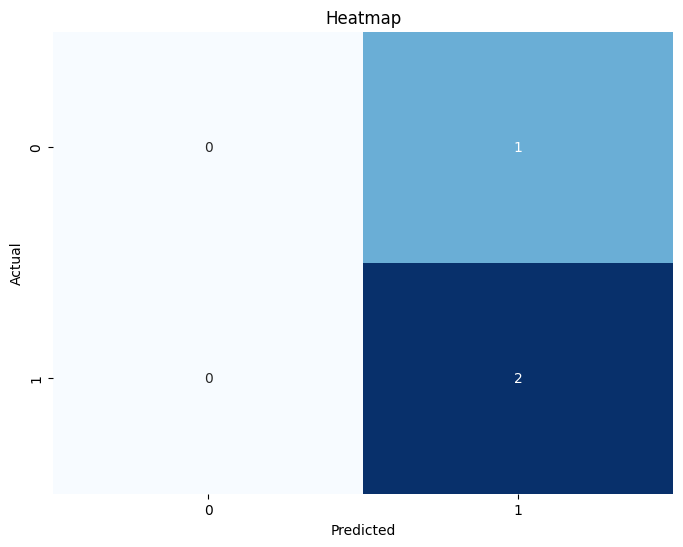

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues', cbar= False)
plt.title('Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()